<a href="https://colab.research.google.com/github/Mmbsaksd/Customer-segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Feature Engineering**

##**Importing**

In [1]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the datasets
df = pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')


##**Data Inspection**

In [3]:
#First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
#Checking shape
df.shape

(541909, 8)

In [6]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
#Checking the statistical discribtion
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


##**Handling Missing Data**

In [8]:
from pandas.core import missing
#Missing value count Function
def show_missing():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

#Missing data count and percentage
print("Missing Data Count")
print(df[show_missing()].isnull().sum().sort_values(ascending=False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [9]:
#Handling the missing values
#Customer id is irrelavant so dropping
df.drop('CustomerID', axis=1, inplace=True)

#Description cant be imputed by mesuare of tendancy
#So dropping null value row
df.dropna(inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,United Kingdom


In [10]:
#Reconfirmation on null value
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

##**Removing Cancelled Rows**

In [11]:
#Converting invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

#Remove row which are cancelled
df = df[~df['InvoiceNo'].str.contains('C')]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,United Kingdom


##**Date Columns Split**

In [12]:
#Extracting element from invoice date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['Hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Minute'] = df['InvoiceDate'].apply(lambda x: x.minute)


In [13]:
#Create total amount columns
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#DataFrame Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,Wednesday,December,1,2010,8,26,20.34


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531167 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     531167 non-null  object        
 1   StockCode     531167 non-null  object        
 2   Description   531167 non-null  object        
 3   Quantity      531167 non-null  int64         
 4   InvoiceDate   531167 non-null  datetime64[ns]
 5   UnitPrice     531167 non-null  float64       
 6   Country       531167 non-null  object        
 7   WeekDay       531167 non-null  object        
 8   Month         531167 non-null  object        
 9   Day           531167 non-null  int64         
 10  Year          531167 non-null  int64         
 11  Hour          531167 non-null  int64         
 12  Minute        531167 non-null  int64         
 13  Total_Amount  531167 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(6)
memory usage: 

#**Explorative Data Analysis(EDA)**

In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'WeekDay', 'Month', 'Day', 'Year', 'Hour',
       'Minute', 'Total_Amount'],
      dtype='object')

In [16]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2327
1,JUMBO BAG RED RETROSPOT,2115
2,REGENCY CAKESTAND 3 TIER,2019
3,PARTY BUNTING,1707
4,LUNCH BAG RED RETROSPOT,1594


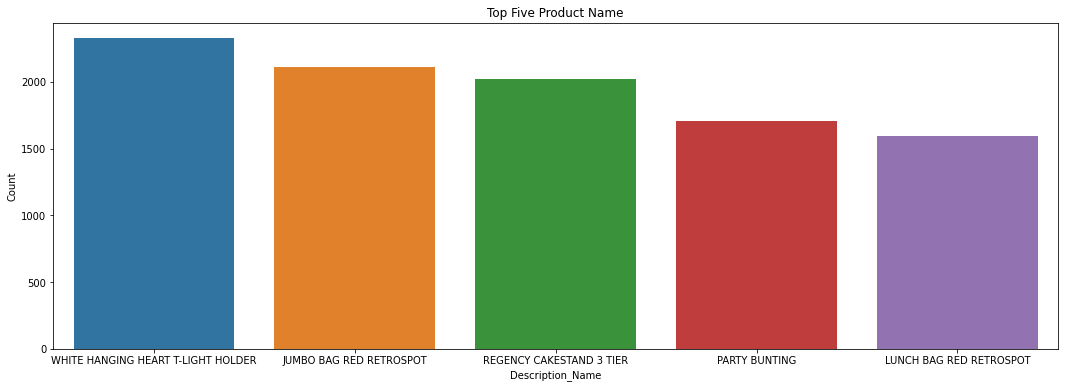

In [17]:
#Plotting on barplot
plt.figure(figsize=(18,6))
plt.title('Top Five Product Name')
sns.barplot(x='Description_Name',y='Count', data=Description_df[:5])

**Top Five product based on selling**


1.   Whit Hanging Heart Light Holder
2.   Regency Cake Stand 3 Tier
3.   Jumbo Bang Red Retrospect
4.   Assorted Colour Bird Arangment
5.   Party Bunting

In [18]:
#Printing last five rows
Description_df.tail()

,Description_Name,Count
4202,CRYSTAL CHANDELIER T-LIGHT HOLDER,1
4203,PURPLE CHUNKY GLASS+BEAD NECKLACE,1
4204,IVORY PANTRY HANGING LAMP,1
4205,GREEN PENDANT SHELL NECKLACE,1
4206,"PAPER CRAFT , LITTLE BIRDIE",1


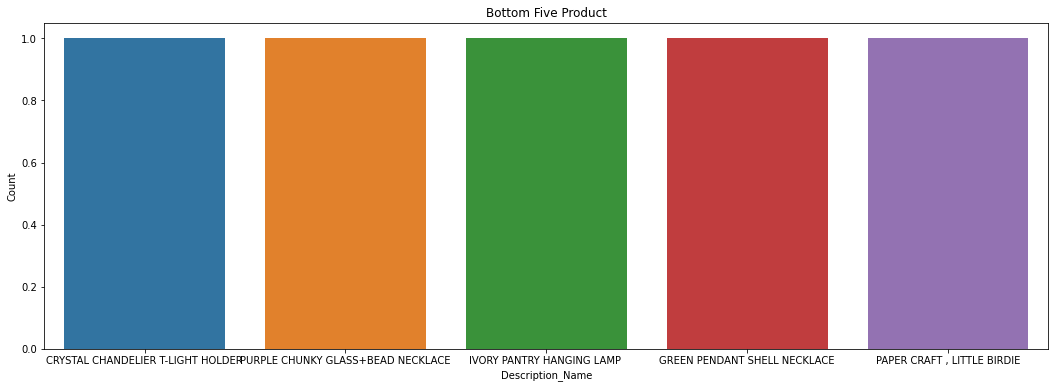

In [19]:
#Plotting bottom five Product Based On Selling
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom Five Product**

1.   Ruby GlassCluster Earning
2.   Pink Chrysanthemums Art Flower
3.   Cake Case Vintage Christmas
4    Wall Art The Magic Forest
5.   Paper Craft Little Birdie



In [20]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2271
1,85099B,2115
2,22423,2022
3,47566,1707
4,20725,1595


In [21]:
#Printing Bottom Five rows
Stockcode_df.tail()

,StockCode_Name,Count
3938,90021,1
3939,DCGS0004,1
3940,84705C,1
3941,20964,1
3942,23843,1


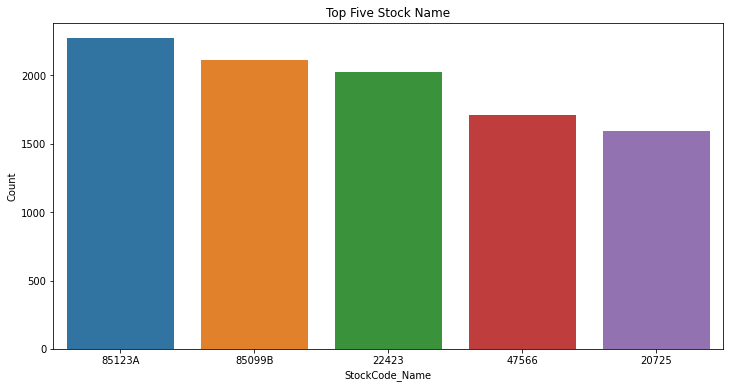

In [22]:
#Plotting Top Five Stock
plt.figure(figsize=(12,6))
plt.title('Top Five Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[:5])

**Top Five Stock Name**


1.   85123A
2.   22423
3.   85099B
4.   83879
5.   47566


In [23]:
#List of bottom 5 stockcode name
Stockcode_df.tail()

,StockCode_Name,Count
3938,90021,1
3939,DCGS0004,1
3940,84705C,1
3941,20964,1
3942,23843,1


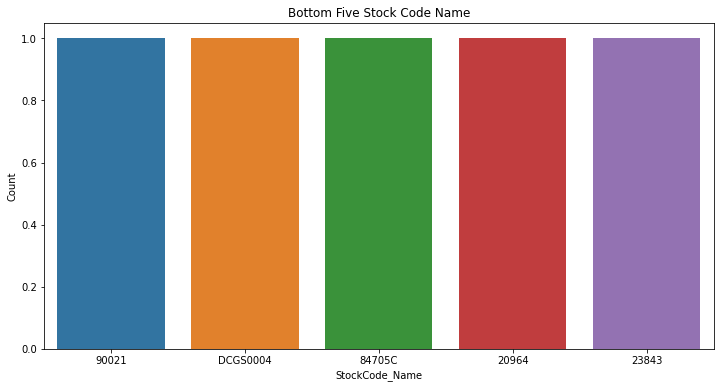

In [24]:
#Plotting bottom five stockcode name
plt.figure(figsize=(12,6))
plt.title('Bottom Five Stock Code Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[-5:])

In [25]:
#Creating the table of countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,486168
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485


In [26]:
#Print tail of countries distribution
country_df.tail()

,Country_Name,Count
33,Lithuania,35
34,Brazil,32
35,Czech Republic,25
36,Bahrain,18
37,Saudi Arabia,9


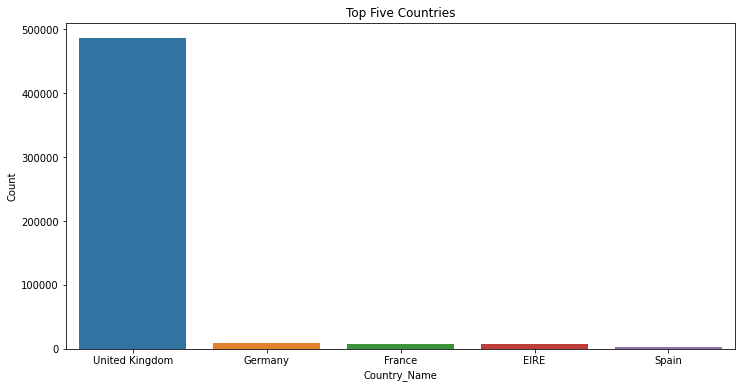

In [27]:
#Ploting top five countries
plt.figure(figsize=(12,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count',data=country_df[:5] )

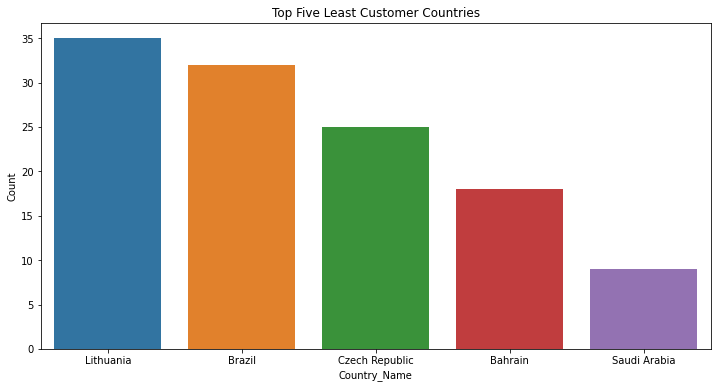

In [28]:
#Plotting top least customer countries
plt.figure(figsize=(12,6))
plt.title('Top Five Least Customer Countries')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**Observation On Countries Distribution**

*   Most customer are belong to UK, then Germany, France, EIFE and Spain respectively
*   Least customer company are Greece, United Arab Emirate, Austria, Israel and Soudia Arabia


In [29]:
#Checking customer of soudia arabia
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,Saudi Arabia,Thursday,February,24,2011,10,34,5.04
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,Saudi Arabia,Thursday,February,24,2011,10,34,10.98
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,Saudi Arabia,Thursday,February,24,2011,10,34,17.40


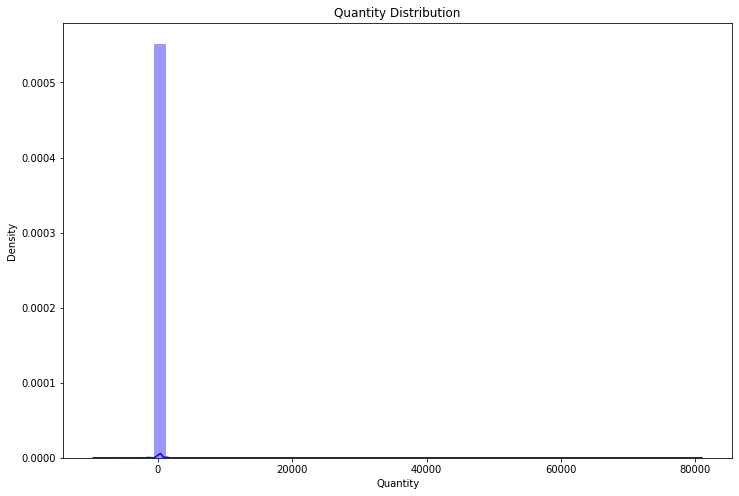

In [30]:
#Plotting Distribution of Quantity
plt.figure(figsize=(12,8))
plt.title("Quantity Distribution")
sns.distplot(df['Quantity'],color="B")

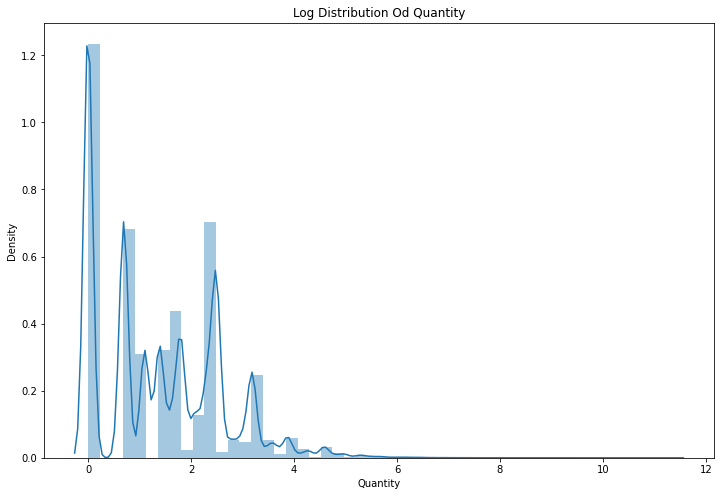

In [31]:
#Distribution Of Quantity with log
plt.figure(figsize=(12,8))
plt.title('Log Distribution Od Quantity')
sns.distplot(np.log(df['Quantity']))

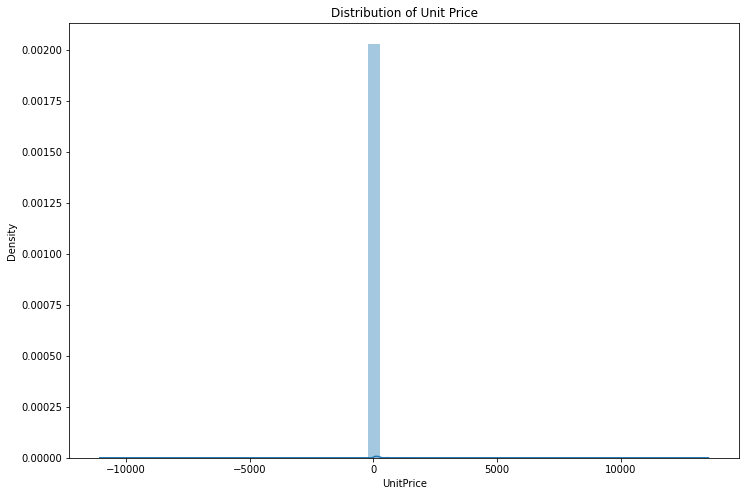

In [32]:
#Checking the disatribution of unitprice
plt.figure(figsize=(12,8))
plt.title('Distribution of Unit Price')
sns.distplot(df['UnitPrice'])

In [33]:
#Checking the dispersion of price unit
df['UnitPrice'].describe([0.75,0.90,0.95,0.99])

count    531167.000000
mean          3.858153
std          41.814651
min      -11062.060000
50%           2.080000
75%           4.130000
90%           7.950000
95%           9.950000
99%          16.980000
max       13541.330000
Name: UnitPrice, dtype: float64

#**Model Building**

In [34]:
#Importing kmean and required evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [39]:
#Preprocessing for k in kmeans
x_features = df[['Total_Amount']]
scal_featues = StandardScaler()
x = scal_featues.fit_transform(x_features)
ran_n_cl = [2,3,4,5,6,7,8,9,10,11,12, 13, 14, 15,16,17,18]
for n_clusters in ran_n_cl:
  kmeans_clust = KMeans(n_clusters = n_clusters)
  pred = kmeans_clust.fit_predict(x)
  centers = kmeans_clust.cluster_centers_

  score = calinski_harabasz_score(x,pred)
  print("For n_clusters ={}, calinski harabasz score is {}".format(n_clusters,score))

For n_clusters =2, calinski harabasz score is 1814498.1105627997
For n_clusters =3, calinski harabasz score is 2406068.9000138086
For n_clusters =4, calinski harabasz score is 2613994.805384462
For n_clusters =5, calinski harabasz score is 2837152.01863558
For n_clusters =6, calinski harabasz score is 3415183.079364887
For n_clusters =7, calinski harabasz score is 3924647.2263844246
For n_clusters =8, calinski harabasz score is 4751960.180839724
For n_clusters =9, calinski harabasz score is 6140650.117350361
For n_clusters =10, calinski harabasz score is 7505191.911304855
For n_clusters =11, calinski harabasz score is 8848593.086467322
For n_clusters =12, calinski harabasz score is 10321375.271873541
For n_clusters =13, calinski harabasz score is 11702350.400776759
For n_clusters =14, calinski harabasz score is 13489872.37293848
For n_clusters =15, calinski harabasz score is 16102073.265834019
For n_clusters =16, calinski harabasz score is 18092025.520876575
For n_clusters =17, calinsk

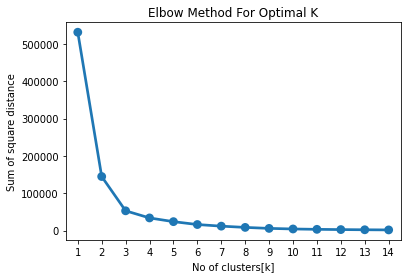

In [40]:
#Plotting Elbow chart
sum_sq_dt = {}
for k in range(1,15):
  km = KMeans(n_clusters= k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  sum_sq_dt[k] = km.inertia_

sns.pointplot(x=list(sum_sq_dt.keys()),y=list(sum_sq_dt.values()))
plt.title("Elbow Method For Optimal K")
plt.xlabel('No of clusters[k]')
plt.ylabel("Sum of square distance")
plt.show()

TypeError: ignored

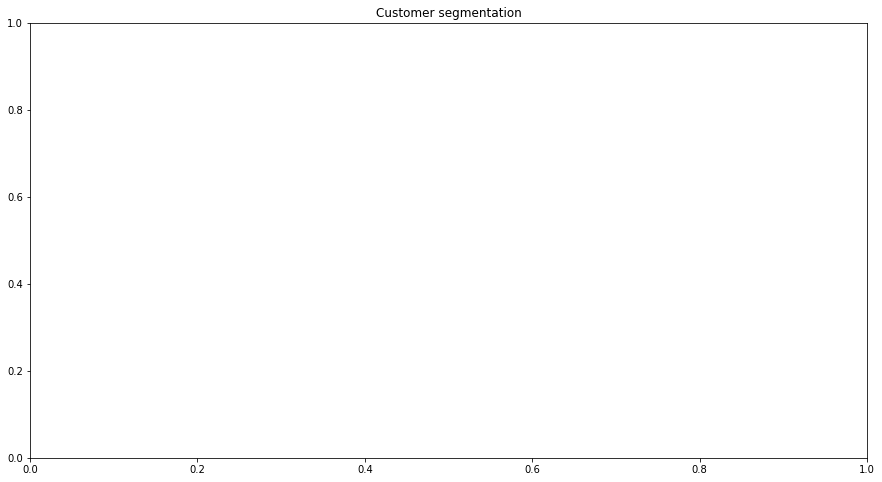

In [43]:
#Implimenting kmean with optimized k value
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=1000)
y_kmeans = kmeans.fit_predict(x)

#Plotting revised k value model
plt.figure(figsize=(15,8))
plt.title('Customer segmentation')
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)

In [45]:
x.shape

(531167, 1)

In [46]:
df['Customer Cluster'] = kmeans.labels_
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount,Customer Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,Wednesday,December,1,2010,8,26,15.30,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,Wednesday,December,1,2010,8,26,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,Wednesday,December,1,2010,8,26,22.00,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,Wednesday,December,1,2010,8,26,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,Wednesday,December,1,2010,8,26,20.34,2


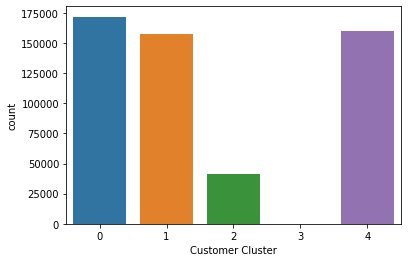

In [47]:
#Plotting the customer segment by k means
sns.countplot(df['Customer Cluster'])

In [53]:
labels = kmeans.labels_
print('Intertia at K =', 5, ':', kmeans.inertia_)
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, labels))
print("---------------------------------------------------------------")

Intertia at K = 5 : 1106484.992595409
Calinski-Harabasz Index: 185941.845
Davies-Bouldin Index: 0.924
---------------------------------------------------------------
